In [1]:
%matplotlib inline
import numpy as np
import scipy.integrate as integ
import matplotlib.pyplot as plt

def f(x,y,a,b):
    return np.exp(-(((x-a)/a)**2+((y-b)/b)**2)/2)/(a*b*2*np.pi)
#y=np.linspace(-100,100,10000)
#plt.plot(y,integ.quad(f, -np.inf, np.inf,args=(3,4,y)))
#x,y=np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))
#plt.contourf(x,y,f(x,y,10,4))
#plt.show()
#res,err=integ.quad(f, -np.inf, np.inf,args=(0,3,4))
#print(res*np.sqrt(2*np.pi)*4*np.exp(1/2))
#print(err)
def f2(x,a):
    return np.exp(-(x/a)**2/2)/(a*np.sqrt(2*np.pi) )
res,err=integ.quad(f2, -100, 100,args=(1,))
#plt.figure(2)
#plt.plot(np.linspace(-20,20,100),f2(np.linspace(-20,20,100),1))
#plt.show()
print(res)
print(err)
def fint(a,b):
    return integ.dblquad(f, -np.inf, np.inf, lambda x: 0, lambda x: np.inf,args=(a,b))
    #return integ.dblquad(f, -np.inf, np.inf, lambda x: 0, lambda x: np.inf,args=(a,b))
    #return integ.quad(lambda a,b,y: integ.quad(f, -np.inf, np.inf,args=(a,b,y)),-np.inf,np.inf,args=(a,b))
    #return integ.quad(f, -np.inf, np.inf,args=(a,b,0))
res,err = fint(3,4)
print(res)
print(err)
#def f(a,b,x):
#    return np.exp(-(((x-a)/b)**2)/2)/(b*np.sqrt(2*np.pi))
#def fint(a,b):
#    return integ.quad(f, -np.inf, np.inf,args=(a,b))
#res,err = fint(3,4)
#res

1.0000000000000002
1.0346447361664605e-12
0.8413447460854371
4.683631640725952e-09


In [6]:
import sympy as sym

a,b,x,y = sym.symbols(" a b x y")
def fsym(a,b,x,y):
    return sym.exp(-(((x-a)/a)**2+((y-b)/b)**2)/2)/(a*b*2*sym.pi)
sym.N(sym.integrate(fsym(3,4,x,0),(x,-sym.oo, sym.oo))*sym.sqrt(sym.pi*2)*4*sym.exp(1/2))

1.00000000000000

characteristic frequency:  9.68245836552


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


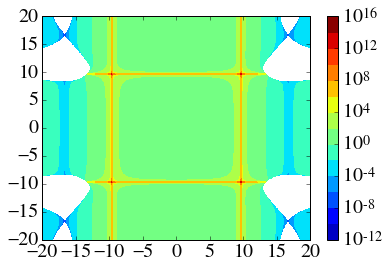

The frequency is:  0.968245836552
-inf -10.1824583655 -inf -10.1824583655


/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)
/home/nnem614/Documents/anaconda3/envs/py35/lib/python3.5/site-packages/scipy/integrate/quadpack.py:357: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  warnings.warn(msg, IntegrationWarning)


-inf -10.1824583655 -9.18245836552 9.18245836552
-inf -10.1824583655 10.1824583655 inf


In [ ]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.integrate as integ
from IPython.core.debugger import Tracer
from matplotlib.colors import LogNorm
import numdifftools as nd
#Tracer()() #this one triggers the debugger
import time

mpl.rc('font',family='FreeSerif')
mpl.rc('xtick',labelsize=20)
mpl.rc('ytick',labelsize=20)

def sens(x,delta,kapa,kapb,ra,rb,kta,ktb,phib,La,Lb):
# Function to determine the phase sensitivity of the setup
    ## Parameters from inputs ##
    kapa  = kapa*2*np.pi
    kapb  = kapb*2*np.pi
    La    = La/100.
    Lb    = Lb/100.
    phib  = phib*np.pi
    taua  = kta/kapa
    taub  = ktb/kapa
    Del   = delta*kapa
    eps   = x*kapa
    kap1a = kapa * ra                         #\kappa_{1,a} (coupling on the right hand side in mode a)
    kap1b = kapb * rb                         #\kappa_{1,b} (coupling on the right hand side in mode b)
    kap2a = kapa * (1-ra)                     #\kappa_{2,a} (coupling on the left hand side in mode a)
    kap2b = kapb * (1-rb)                     #\kappa_{2,b} (coupling on the left hand side in mode b)

    ka = 2*np.sqrt(ra*(1-ra)*(1-La))*kapa    #k_a (feedback strength in mode a)
    kb = 2*np.sqrt(rb*(1-rb)*(1-Lb))*kapb    #k_b (feedback strength in mode b)
    
    specfreq = np.sqrt(ka**2-(kapa-eps)**2)/np.pi/2.
    print("characteristic frequency: ",specfreq)
    ### EXPRESSIONS ###
    def Ei(nu,t,phi):
        return np.exp(1j*(nu*t+phi))
    def d(nu,t,phi,kap,Del,k): #dpa if Del&phi, dma if -Del&-phi, dmb if Del&-phi, dpb if -Del&phi
        return kap - 1j*(nu+Del) + k*Ei(nu,t,-phi)
    def Lf(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,eps):#Lab if Del&p is a
        return abs(eps)**2 - d(nu,tp,phip,kapp,Del,kp)*d(nu,tm,-phim,kapm,Del,km)
    def K(nu,t,phi,kap,k,kap1,L):
        return kap + k*np.cos(phi+nu*t) - kap1*L    
    def U1(nu,tL,phiL,kapL,kL,kap1L,L,t,phi,kap,k): #in case of ab L is for a
        return 4*K(-nu,tL,phiL,kapL,kL,kap1L,L)*K(nu,t,phi,kap,k,0,0)
    def albe(nu,t,phi,kap1,kap2,L):
        return np.sqrt(2*kap1) + np.sqrt(2*kap2*(1-L))*Ei(nu,t,phi)
    def D(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L,eps):
        return np.sqrt(1-L)*Lf(nu,-Del,tp,phip,kapp,kp,tm,phim,kapm,km,eps)*Ei(nu,tm,phim) +\
        d(nu,tp,phip,kapp,-Del,kp)*albe(nu,tm,phim,kap1,kap2,L)*albe(nu,tm,phim,kap2,kap1,L)
    def E(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L,eps):
        return np.sqrt(L)*np.sqrt(2*kap2)*d(nu,tp,phip,kapp,-Del,kp)*albe(nu,tm,phim,kap2,kap1,L) +\
        Lf(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,eps)
    def R(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L,eps): #for Ra p means b
        return np.conj(albe(nu,tm,phim,kap1,kap2,L))*D(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L,eps) +\
    np.sqrt(2*kap2*L)*E(nu,Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1,kap2,L,eps)
    
    def U(nu,nup,tp,phip,kapp,Del,kp,Lp,kap1p,kap2p,tm,phim,kapm,km,Lm,kap1m,kap2m,eps): #in case of Uab a is p
        return 4*K(-nu,tp,phip,kapp,kp,kap1p,Lp)*K(nu,tm,phim,kapm,km,kap1m,0)*\
    (abs(D(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp,eps))**2+\
     abs(E(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp,eps))**2) +\
    np.conj(albe(-nu,tp,phip,kap2p,kap1p,Lp))*np.conj(R(nu,-Del,tp,phip,kapp,kp,tm,phim,kapm,km,kap1m,kap2m,Lm,eps))*\
    albe(nup,tm,phim,kap2m,kap1m,Lm)*R(nup,Del,tm,phim,kapm,km,tp,phip,kapp,kp,kap1p,kap2p,Lp,eps)
    
    #Uncertainty of the particle number 
    def uncert(nu,nup,phi,eps):
        return np.real(np.abs(eps)**2*(U(nu,nup,taua,phib+phi,kapa,Del,ka,La,kap1a,kap2a,taub,phib,kapb,kb,Lb,kap1b,kap2b,eps)+\
                               U(-nu,-nup,taub,phib,kapb,Del,kb,Lb,kap1b,kap2b,taua,phib+phi,kapa,ka,La,kap1a,kap2a,eps))/\
                            (np.abs(Lf(nu,Del,taua,phib+phi,kapa,ka,taub,phib,kapb,kb,eps))**2*\
                            np.abs(Lf(nup,-Del,taub,phib,kapb,kb,taua,phib+phi,kapa,ka,eps))**2))
    def unc_int(phi,eps):
        lims = np.array([[-np.inf,-(specfreq-.5)*2*np.pi,(specfreq+.5)*2*np.pi],\
                         [-(specfreq+.5)*2*np.pi,(specfreq-.5)*2*np.pi,np.inf]])
        integral = 0
        for i1 in range(3):
            for i2 in range(3):
                print(lims[0,i1]/2/np.pi,lims[1,i1]/2/np.pi,lims[0,i2]/2/np.pi,lims[1,i2]/2/np.pi)
                res,err = integ.dblquad(uncert,lims[0,i1],lims[1,i1],\
                                  lambda nup: lims[0,i2],lambda nup: lims[1,i2], args=(phi,eps),epsabs=100)
                integral += res
        return integral
    ##IMPORTANT! This double integral only works with python 3.
    
    #Expectation value of the outgoing photon number
    def I_exp(nu,phi,eps):
        return np.real(eps**2*\
    (U1(nu,taua,phib+phi,kapa,ka,kap1a,La,taub,phib,kapb,kb)/(np.abs(Lf(nu,Del,taua,phib+phi,kapa,ka,taub,phib,kapb,kb,eps))**2) + 
     U1(-nu,taub,phib,kapb,kb,kap1b,Lb,taua,phib+phi,kapa,ka)/(np.abs(Lf(-nu,-Del,taub,phib,kapb,kb,taua,phib+phi,kapa,ka,eps))**2)))
    def I_int(phi,eps):
        res,err = integ.quad(I_exp,-np.inf,np.inf,args=(phi,eps))
        #print(res)
        return res
    
    nus  = np.linspace(-20,20,501)
    nups = np.linspace(-20,20,501)
    phis = np.linspace(-1,1,101)
    nu,phi = np.meshgrid(nus,phis)
    nu,nup = np.meshgrid(nus,nups)
    plt.contourf(nu,nup,uncert(2*np.pi*nu,2*np.pi*nup,0,0.75*kapa),400,cmap=plt.cm.jet,norm = LogNorm())
    plt.colorbar()
    plt.show()

    print("The frequency is: ",np.sqrt((ka/kapa)**2-(1-x)**2))
    uncertain = unc_int(0.0,.75*kapa)
    print("The integral is: ", uncertain)
    
#sens(x,delta,kapa,kapb,ra,rb,kta,ktb,phib,La,Lb)
start = time.time()
sens(.75,0,10,10,0.5,0.5,1.8833,1.8833,0,0,0)
end = time.time()
print("Time elapsed: ", end-start)

In [38]:
n = 0
for i in range(4):
    n += 2*i
    print(n)
specfreq = 5
i2 = 2
lims = np.array([[-np.inf,-(specfreq-.5)*2*np.pi,(specfreq+.5)*2*np.pi],\
                 [-(specfreq+.5)*2*np.pi,(specfreq-.5)*2*np.pi,np.inf]])    
lims[0,i2]

0
2
6
12


34.557519189487721